# Possible Problem Statement

"Predict the likelihood of death in heart failure patients based on clinical records."

This is a binary classification problem, where the goal is to build a model that predicts whether a patient is at risk of death (DEATH_EVENT) using the provided features.

I can proceed with data exploration, preprocessing, and model building. 

# Dataset Overview

The dataset contains 13 columns and 299 records. Key details are:

Features:

DEMOGRAPHICS: age, sex

HEALTH CONDITION: anaemia, diabetes, high_blood_pressure, smoking

LAB RESULTS: creatinine_phosphokinase, platelets, serum_creatinine, serum_sodium

HEART PERFORMANCE METRICES: ejection_fraction, time (duration of follow-up in days)

Target Variable:

DEATH_EVENT: Indicates if the patient died during the follow-up period (1: Yes, 0: No).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

In [6]:
a=df.columns
a

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
for i in a:
    print(df[i].value_counts())
    print('*'*50)

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
**************************************************
0    170
1    129
Name: anaemia, dtype: int64
**************************************************
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
**************************************

In [8]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.062728,-0.001943,-0.268603,0.079351,-0.049139,0.294278,-0.195204,-0.004316,-0.012623,-0.526964,1.0


# Handling Outlier

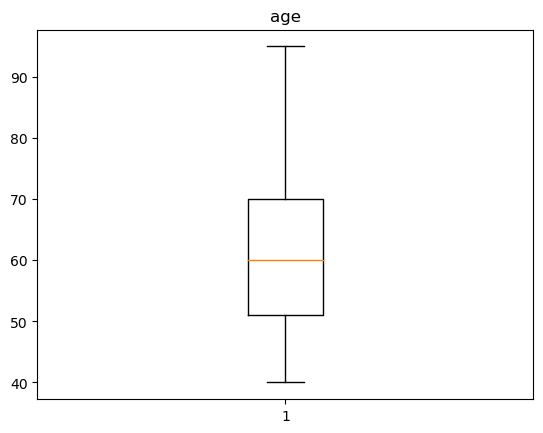

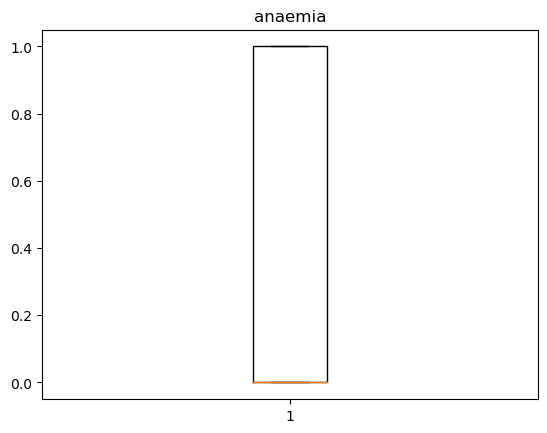

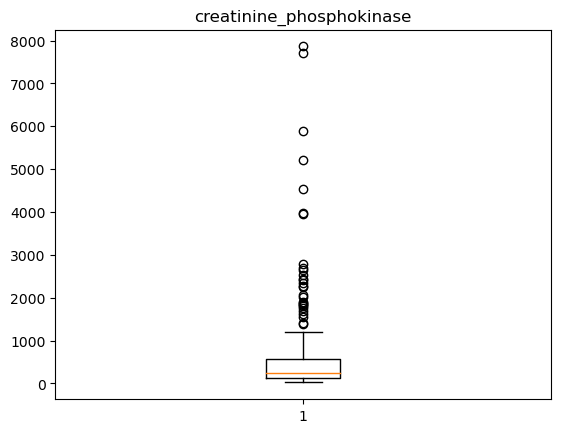

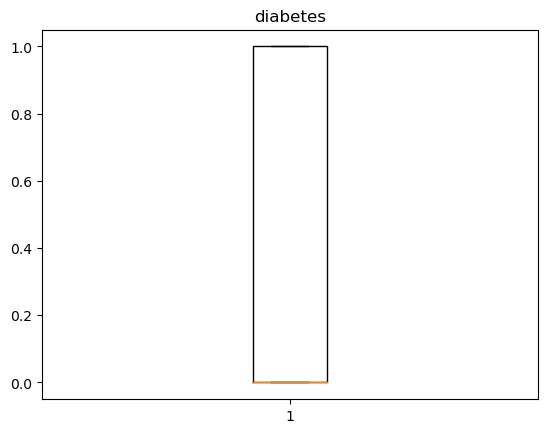

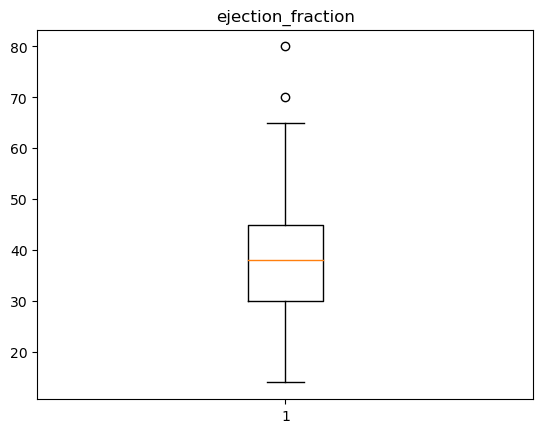

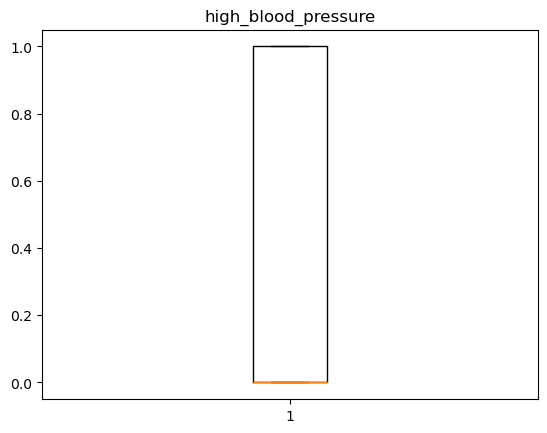

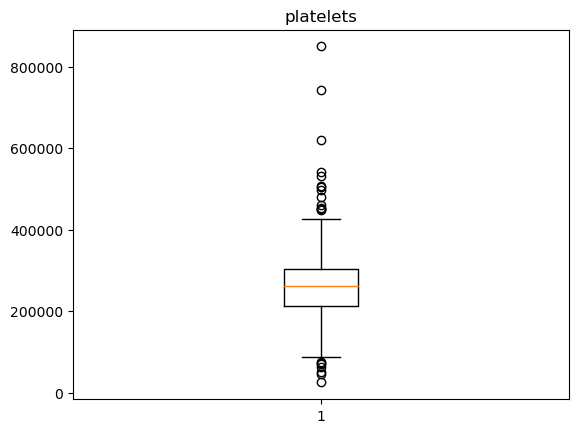

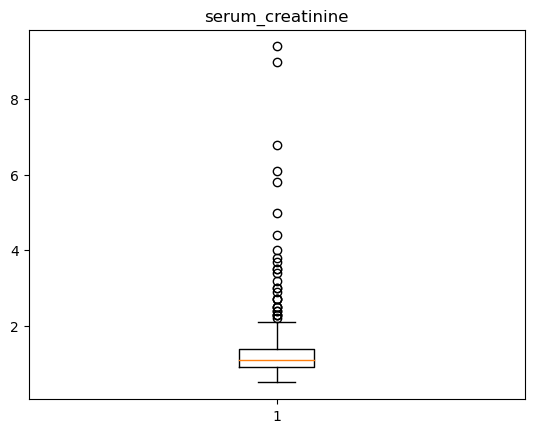

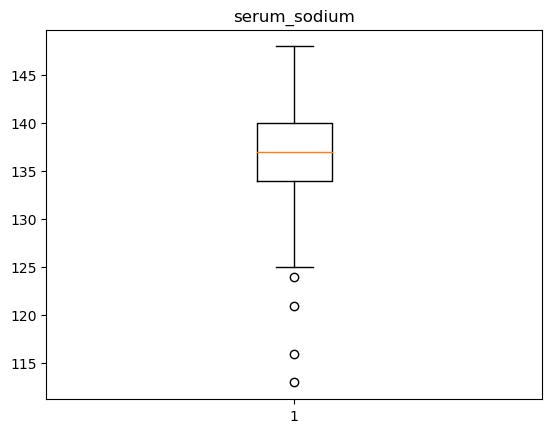

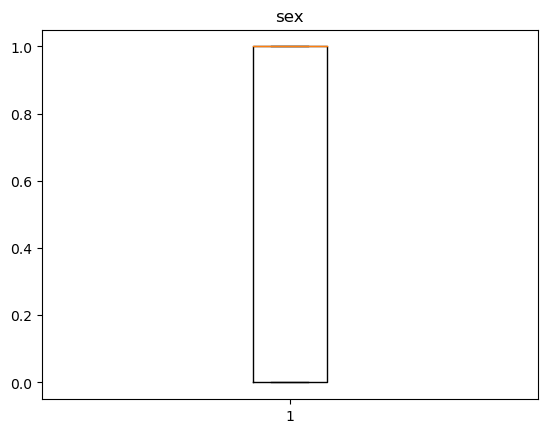

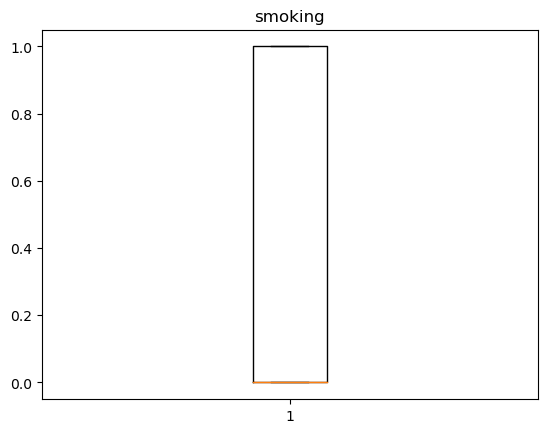

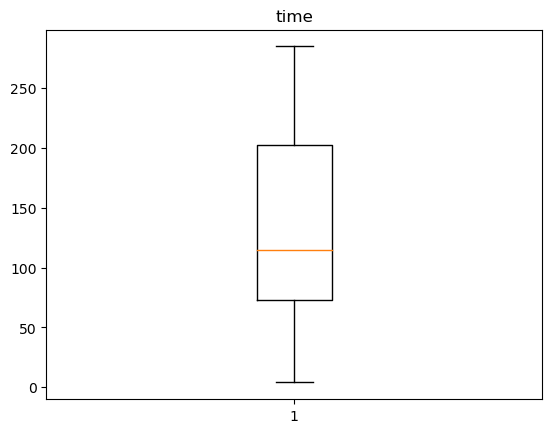

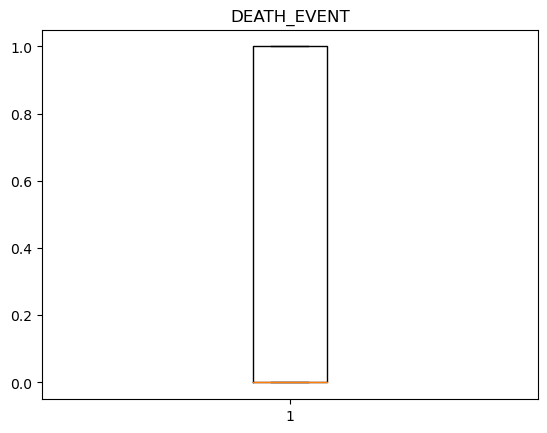

In [10]:
for i in a:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [11]:
q1=df["creatinine_phosphokinase"].quantile(0.25)
q3=df["creatinine_phosphokinase"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 116.5
q3 582.0
iqr 465.5
upper_tail 1280.25
lower_tail -581.75


In [12]:
df.loc[df["creatinine_phosphokinase"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30,0
46,51.0,0,1380,0,25,1,271000.00,0.90,130,1,0,38,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
107,45.0,1,1876,1,35,0,226000.00,0.90,138,1,0,88,0
130,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106,0
134,81.0,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0


In [13]:
df.loc[df["creatinine_phosphokinase"]>ub,"creatinine_phosphokinase"]=ub

In [14]:
df.loc[df["creatinine_phosphokinase"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [15]:
q1=df["ejection_fraction"].quantile(0.25)
q3=df["ejection_fraction"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_taila",lb)

q1 30.0
q3 45.0
iqr 15.0
upper_tail 67.5
lower_taila 7.5


In [16]:
df.loc[df["ejection_fraction"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582.0,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427.0,0,70,1,151000.00,9.00,137,0,0,196,1


In [17]:
df.loc[df["ejection_fraction"]<lb]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [18]:
df.loc[df["ejection_fraction"]>ub,"ejection_fraction"]=ub

In [19]:
df.loc[df["ejection_fraction"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [20]:
q1=df["platelets"].quantile(0.25)
q3=df["platelets"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_taila",lb)

q1 212500.0
q3 303500.0
iqr 91000.0
upper_tail 440000.0
lower_taila 76000.0


In [21]:
df.loc[df["platelets"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
7,60.0,1,315.00,1,60.0,0,454000.0,1.10,131,1,1,10,1
47,60.0,0,582.00,1,38.0,1,451000.0,0.60,138,1,1,40,1
55,95.0,1,371.00,0,30.0,0,461000.0,2.00,132,1,0,50,1
69,65.0,0,113.00,1,25.0,0,497000.0,1.83,135,1,0,67,1
105,72.0,1,328.00,0,30.0,1,621000.0,1.70,138,0,1,88,1
109,45.0,0,292.00,1,35.0,0,850000.0,1.30,142,1,1,88,0
117,85.0,1,102.00,0,60.0,0,507000.0,3.20,138,0,0,94,0
162,63.0,1,582.00,0,40.0,0,448000.0,0.90,137,1,1,123,0
212,78.0,0,224.00,0,50.0,0,481000.0,1.40,138,1,1,192,0
224,58.0,0,582.00,1,25.0,0,504000.0,1.00,138,1,0,205,0


In [22]:
df.loc[df["platelets"]<lb]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
15,82.0,1,379.00,0,50.0,0,47000.0,1.3,136,1,0,13,1
163,50.0,1,1280.25,1,35.0,0,75000.0,0.9,142,0,0,126,1
167,59.0,0,66.00,1,20.0,0,70000.0,2.4,134,1,0,135,1
200,63.0,1,1280.25,0,45.0,0,73000.0,0.7,137,1,0,186,0
230,60.0,0,166.00,0,30.0,0,62000.0,1.7,127,0,0,207,1
277,70.0,0,582.00,1,38.0,0,25100.0,1.1,140,1,0,246,0
281,70.0,0,582.00,0,40.0,0,51000.0,2.7,136,1,1,250,0


In [23]:
df.loc[df["platelets"]>450000,"platelets"]=450000

In [24]:
df.loc[df["platelets"]<150000,"platelets"]=150000

In [25]:
df.loc[df["platelets"]<lb]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [26]:
df.loc[df["platelets"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
7,60.0,1,315.00,1,60.0,0,450000.0,1.10,131,1,1,10,1
47,60.0,0,582.00,1,38.0,1,450000.0,0.60,138,1,1,40,1
55,95.0,1,371.00,0,30.0,0,450000.0,2.00,132,1,0,50,1
69,65.0,0,113.00,1,25.0,0,450000.0,1.83,135,1,0,67,1
105,72.0,1,328.00,0,30.0,1,450000.0,1.70,138,0,1,88,1
109,45.0,0,292.00,1,35.0,0,450000.0,1.30,142,1,1,88,0
117,85.0,1,102.00,0,60.0,0,450000.0,3.20,138,0,0,94,0
162,63.0,1,582.00,0,40.0,0,448000.0,0.90,137,1,1,123,0
212,78.0,0,224.00,0,50.0,0,450000.0,1.40,138,1,1,192,0
224,58.0,0,582.00,1,25.0,0,450000.0,1.00,138,1,0,205,0


In [27]:
q1=df["serum_creatinine"].quantile(0.25)
q3=df["serum_creatinine"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 0.9
q3 1.4
iqr 0.4999999999999999
upper_tail 2.1499999999999995
lower_tail 0.15000000000000024


In [28]:
df.loc[df["serum_creatinine"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160.00,1,20.0,0,327000.00,2.7,116,0,0,8,1
9,80.0,1,123.00,0,35.0,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81.00,0,38.0,1,368000.00,4.0,131,1,1,10,1
28,58.0,1,60.00,0,38.0,0,153000.00,5.8,134,1,0,26,1
31,85.0,0,23.00,0,45.0,0,360000.00,3.0,132,1,0,28,1
35,69.0,0,582.00,1,35.0,0,228000.00,3.5,134,1,0,30,1
38,60.0,0,1280.25,1,30.0,0,305000.00,2.3,137,1,0,30,0
39,60.0,0,235.00,1,38.0,0,329000.00,3.0,142,0,0,30,1
48,80.0,1,553.00,0,20.0,1,150000.00,4.4,133,1,0,41,1
52,60.0,0,1280.25,1,62.0,0,263358.03,6.8,146,0,0,43,1


In [29]:
df.loc[df["serum_creatinine"]>ub,"serum_creatinine"]=ub

In [30]:
df.loc[df["serum_creatinine"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [31]:
q1=df["serum_sodium"].quantile(0.25)
q3=df["serum_sodium"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 134.0
q3 140.0
iqr 6.0
upper_tail 149.0
lower_tail 125.0


In [32]:
df.loc[df["serum_sodium"]>ub]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [33]:
df.loc[df["serum_sodium"]<lb]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160.0,1,20.0,0,327000.00,2.15,116,0,0,8,1
19,48.0,1,582.0,1,55.0,0,150000.00,1.90,121,0,0,15,1
126,46.0,0,168.0,1,17.0,1,271000.00,2.10,124,0,0,100,1
199,60.0,0,1211.0,1,35.0,0,263358.03,1.80,113,1,1,186,0


In [34]:
df.loc[df["serum_sodium"]<lb,"serum_sodium"]=lb

In [35]:
df.loc[df["serum_sodium"]<lb]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [36]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,-0.006355,-0.001943,-0.270611,0.079351,-0.029268,0.388469,-0.20132,-0.004316,-0.012623,-0.526964,1.0


In [37]:
df['ejection_fraction'] = df['ejection_fraction'].apply(np.sqrt)

In [38]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,-0.006355,-0.001943,-0.295614,0.079351,-0.029268,0.388469,-0.20132,-0.004316,-0.012623,-0.526964,1.0


In [39]:
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].apply(np.sqrt)

In [40]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.006538,-0.001943,-0.295614,0.079351,-0.029268,0.388469,-0.20132,-0.004316,-0.012623,-0.526964,1.0


In [41]:
df['diabetes'] = df['diabetes'].apply(np.sqrt)
df['platelets'] = df['platelets'].apply(np.sqrt)
df['serum_sodium'] = df['serum_sodium'].apply(np.sqrt)
df['sex'] = df['sex'].apply(np.sqrt)
df['smoking'] = df['smoking'].apply(np.sqrt)
df['time'] = df['time'].apply(np.sqrt)

In [42]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.006538,-0.001943,-0.295614,0.079351,-0.037862,0.388469,-0.202524,-0.004316,-0.012623,-0.568636,1.0


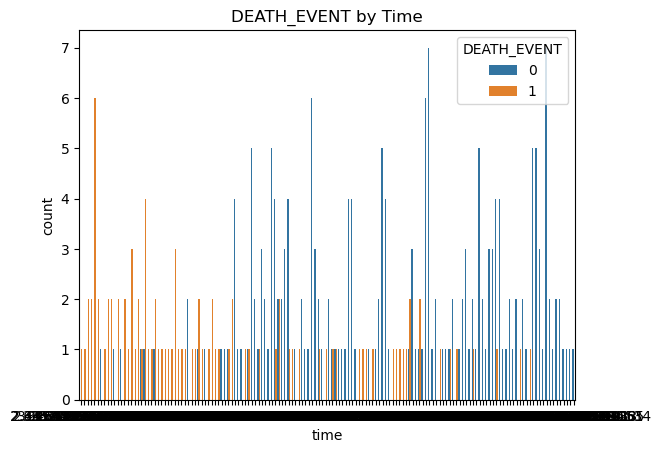

In [43]:
sns.countplot(data=df, x='time', hue='DEATH_EVENT').set_title('DEATH_EVENT by Time');

# Scaling

In [44]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [45]:
#s=MinMaxScaler()

In [46]:
#df1=df.columns
#df1

In [47]:
#for i in df1:
    #df[i]=s.fit_transform(df[[i]])

In [48]:
#df

# Skewness

In [49]:
from scipy.stats import skew

In [50]:
for i in a:
    print(i,df[i].skew())

age 0.42306190672863536
anaemia 0.2782606644055605
creatinine_phosphokinase 0.5475696245808648
diabetes 0.3339286842537603
ejection_fraction 0.1064445851508144
high_blood_pressure 0.6267318547287857
platelets 0.2896188105704376
serum_creatinine 0.9052966236707561
serum_sodium -0.37614913128313476
sex -0.6267318547287857
smoking 0.770348815438949
time -0.40072424661773554
DEATH_EVENT 0.7703488154389491


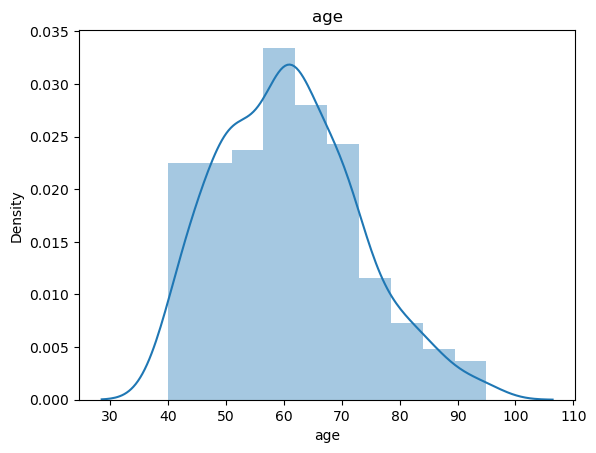

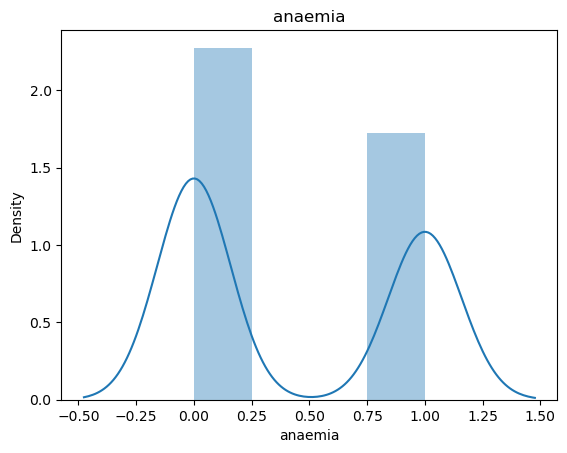

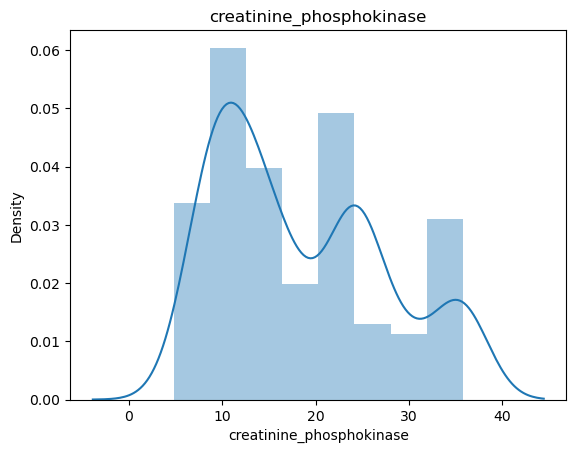

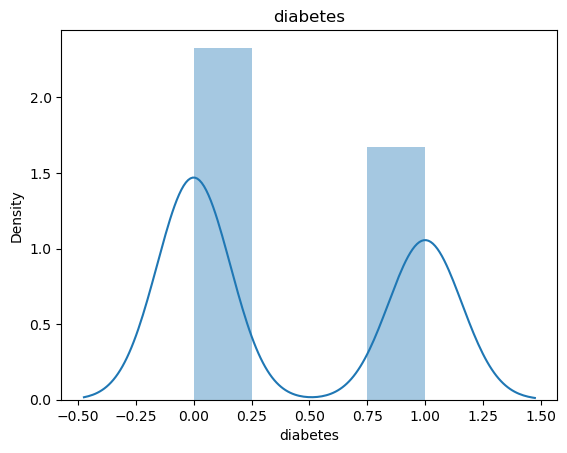

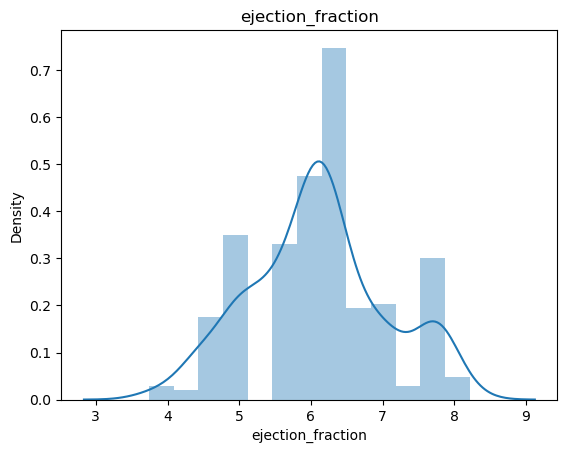

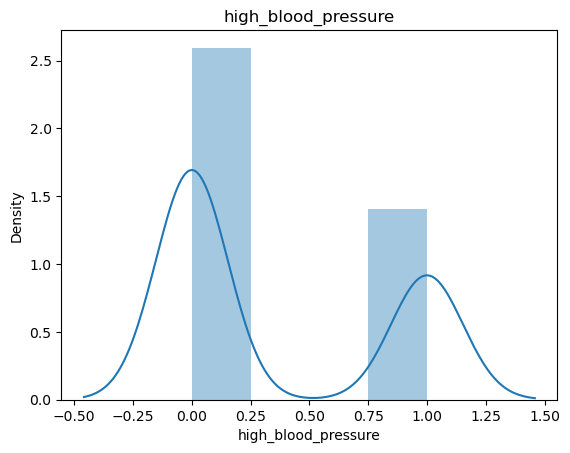

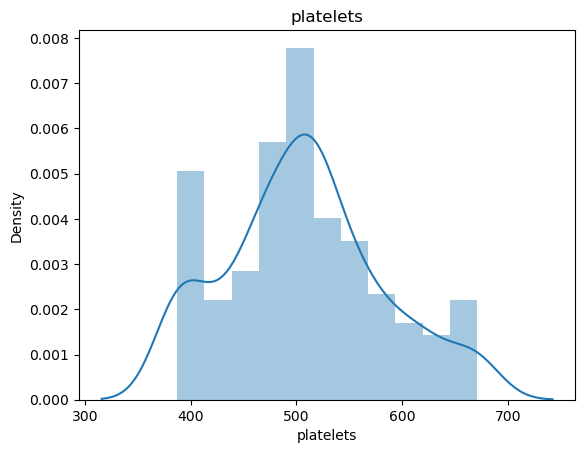

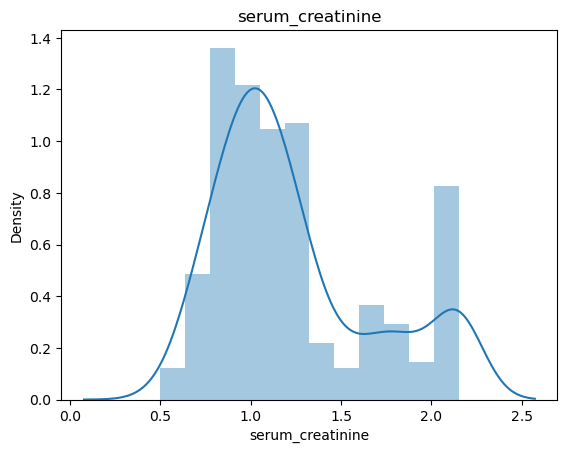

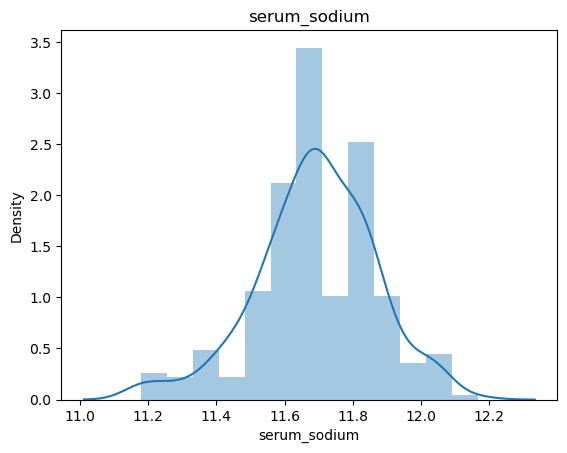

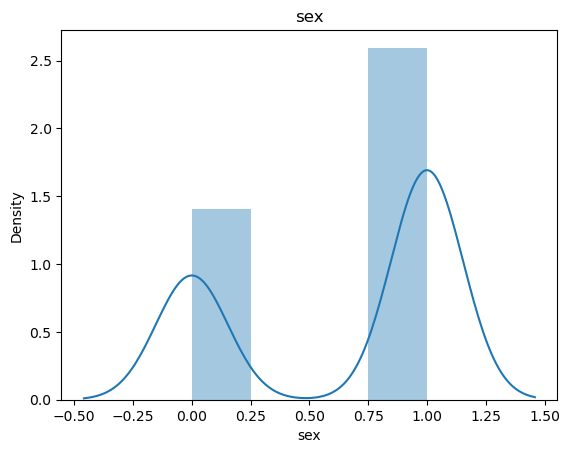

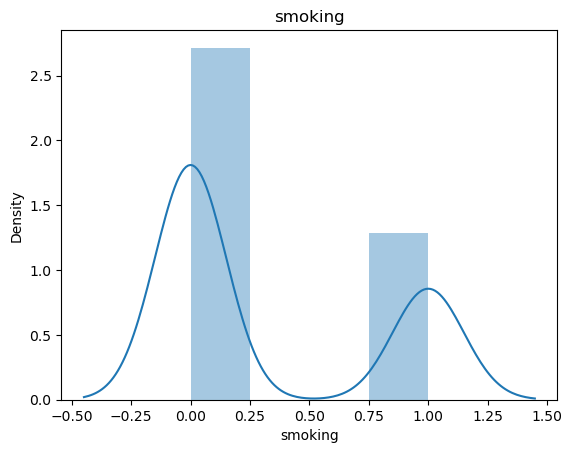

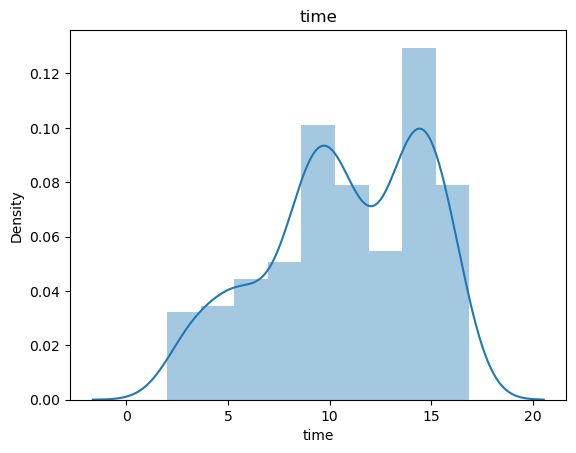

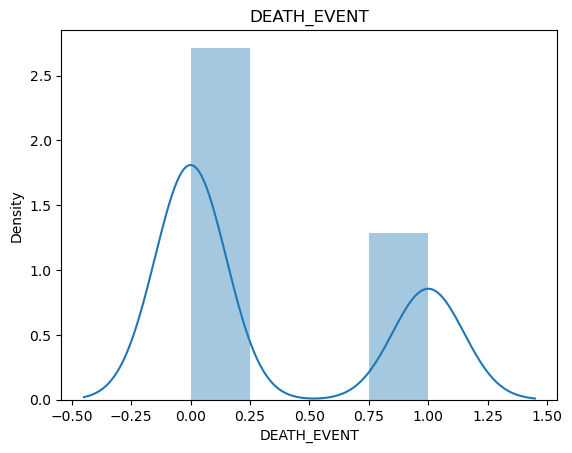

In [51]:
for i in a:
    sns.distplot(df[i], kde=True)
    plt.title(i)
    plt.show()

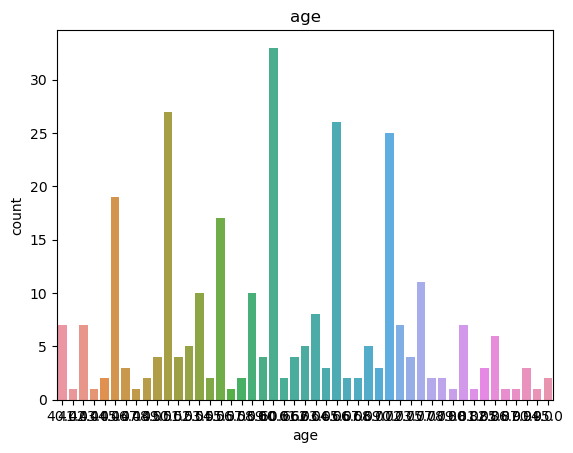

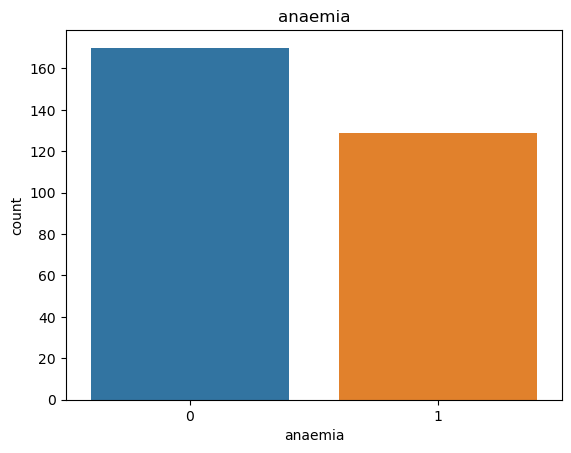

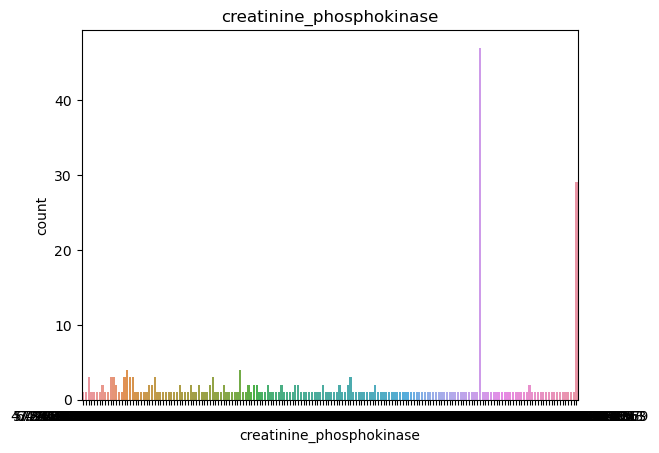

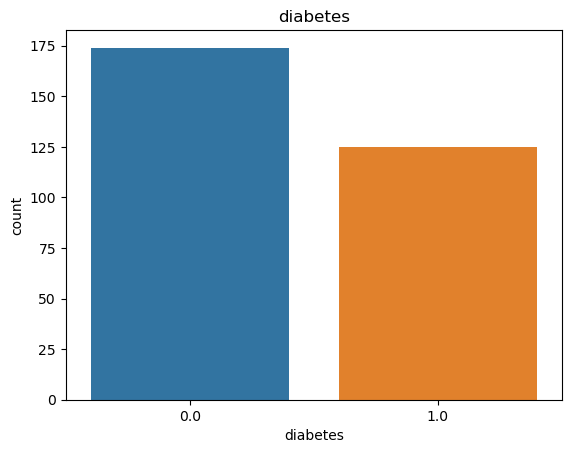

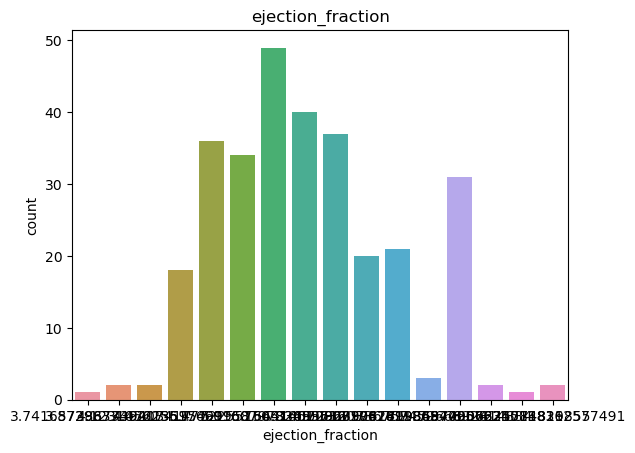

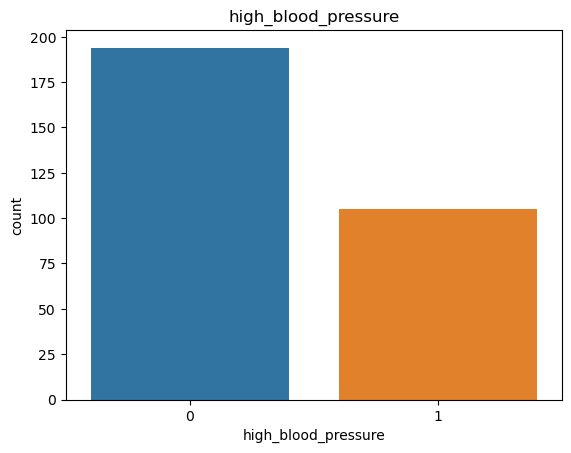

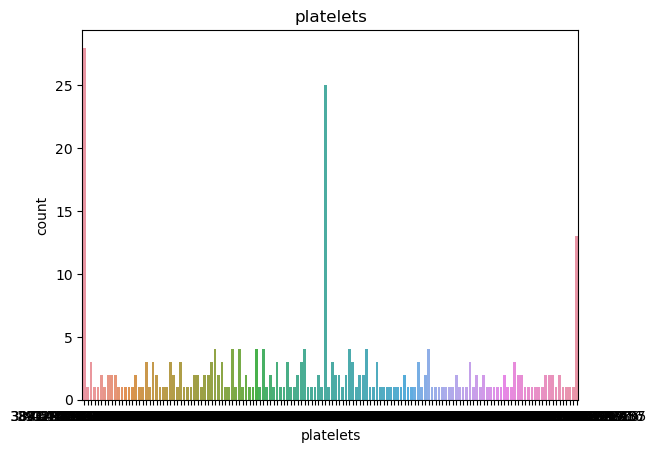

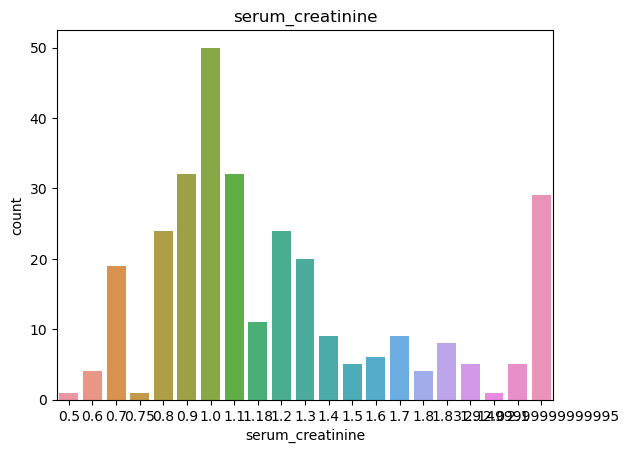

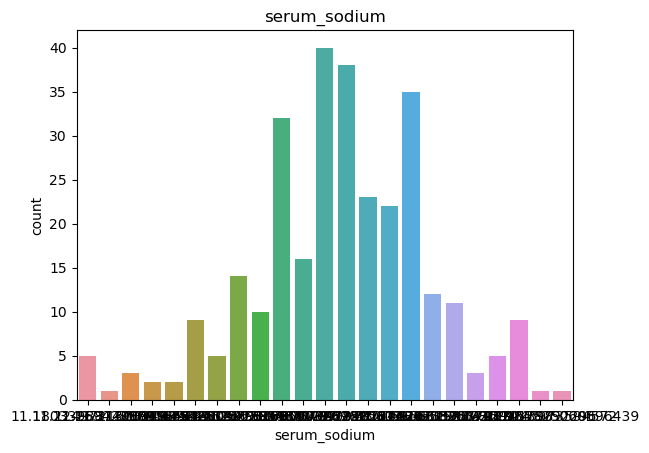

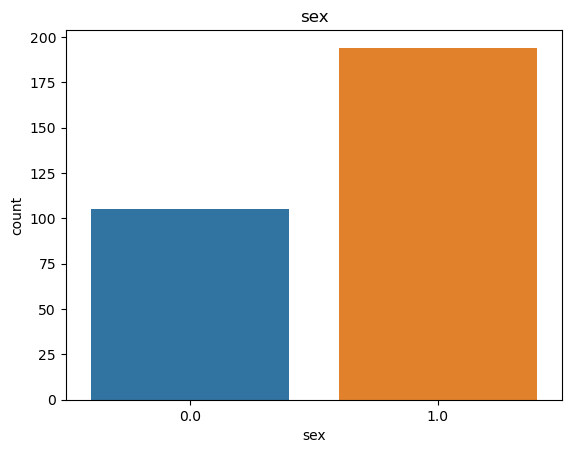

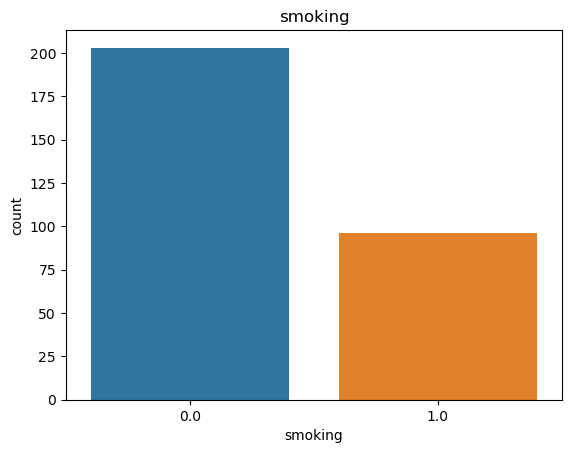

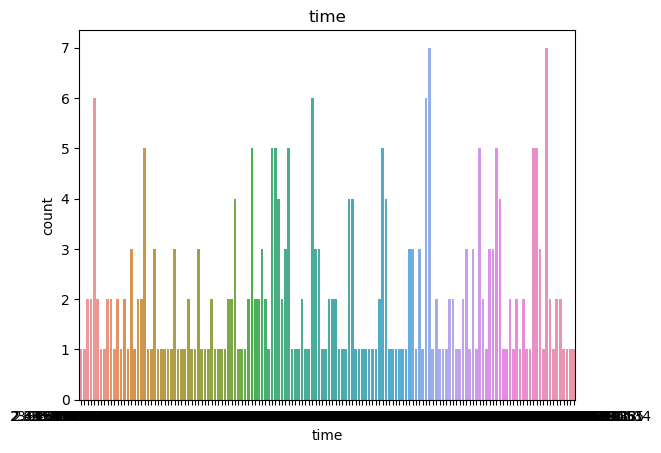

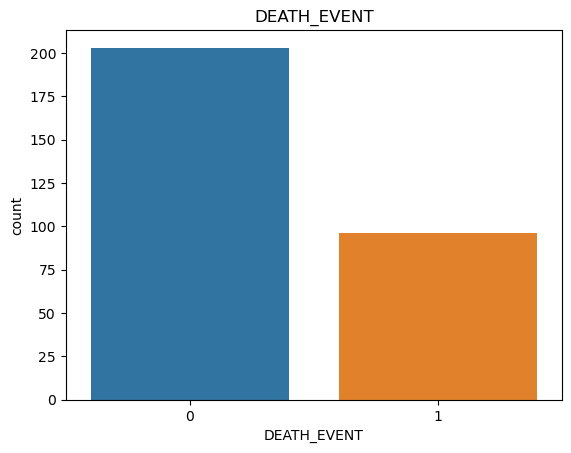

In [52]:
for i in a:
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()

In [53]:
#df=np.log(df)

In [54]:
#df=np.sqrt(df)

In [55]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.006538,-0.001943,-0.295614,0.079351,-0.037862,0.388469,-0.202524,-0.004316,-0.012623,-0.568636,1.0


In [56]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,18.523304,0.418060,6.094324,0.351171,506.992376,1.234515,11.691104,0.648829,0.32107,10.760533,0.32107
std,11.894809,0.496107,9.020767,0.494067,0.946388,0.478136,74.446756,0.440098,0.174839,0.478136,0.46767,3.810559,0.46767
min,40.000000,0.000000,4.795832,0.000000,3.741657,0.000000,387.298335,0.500000,11.180340,0.000000,0.00000,2.000000,0.00000
25%,51.000000,0.000000,10.793293,0.000000,5.477226,0.000000,460.976904,0.900000,11.575837,0.000000,0.00000,8.544004,0.00000
50%,60.000000,0.000000,15.811388,0.000000,6.164414,0.000000,511.859356,1.100000,11.704700,1.000000,0.00000,10.723805,0.00000
75%,70.000000,1.000000,24.124676,1.000000,6.708204,1.000000,550.908154,1.400000,11.832160,1.000000,1.00000,14.247634,1.00000
max,95.000000,1.000000,35.780581,1.000000,8.215838,1.000000,670.820393,2.150000,12.165525,1.000000,1.00000,16.881943,1.00000


In [57]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.006538,-0.001943,-0.295614,0.079351,-0.037862,0.388469,-0.202524,-0.004316,-0.012623,-0.568636,1.0


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

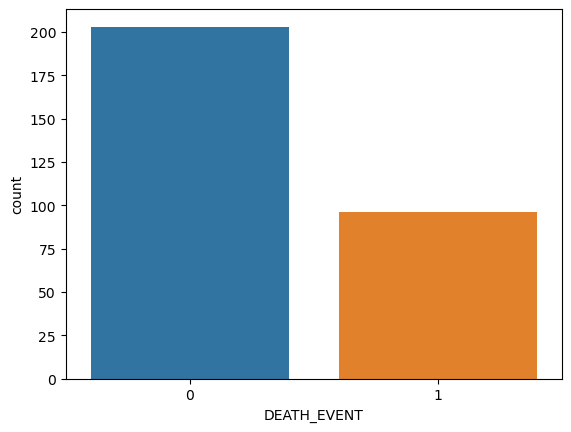

In [58]:
sns.countplot(x = df['DEATH_EVENT'])

In [59]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [61]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

smt = SMOTE(random_state=10)
x_sample, y_sample = smt.fit_resample(x,y)


x = x_sample
y = y_sample

In [62]:
y.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

# Train Test Split

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [64]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [65]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
113,70.0,1,11.958261,0.0,7.745967,0,592.452530,1.30,11.704700,0.0,0.0,9.486833
16,87.0,1,12.206556,0.0,6.164414,0,511.859356,0.90,11.832160,1.0,0.0,3.741657
60,45.0,0,35.780581,1.0,5.000000,1,624.499800,1.00,11.789826,1.0,0.0,7.745967
228,65.0,0,7.483315,0.0,5.000000,0,486.826458,2.15,11.401754,0.0,0.0,14.387495
130,53.0,1,35.780581,0.0,7.745967,1,498.998998,0.70,11.747340,1.0,1.0,10.295630
...,...,...,...,...,...,...,...,...,...,...,...,...
161,45.0,1,11.401754,0.0,5.916080,0,417.133072,0.80,11.789826,1.0,1.0,11.000000
269,40.0,0,24.124676,1.0,5.916080,0,471.168760,1.00,11.489125,1.0,0.0,15.620499
91,60.0,0,29.949958,1.0,6.708204,0,544.977064,1.00,11.532563,1.0,0.0,8.944272
80,70.0,0,8.306624,0.0,6.324555,0,541.294744,1.70,11.661904,0.0,0.0,8.660254


# Logistic Regression

# Model Training

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [67]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [68]:
#testing accuracy
y_pred=model.predict(x_test)

cnf_matrix= confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*45)


multi_cnf_matrix=multilabel_confusion_matrix(y_test, y_pred)
print("Multilabel COnfusion Matrix\n",multi_cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[39  4]
 [ 5 12]]
*********************************************
Multilabel COnfusion Matrix
 [[[12  5]
  [ 4 39]]

 [[39  4]
  [ 5 12]]]
*********************************************
Accuracy:  0.85
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.75      0.71      0.73        17

    accuracy                           0.85        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.85      0.85      0.85        60



In [69]:
# training Accuracy
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multilabel COnfusion Matrix\n",multi_cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[148  12]
 [ 21  58]]
*********************************************
Multilabel COnfusion Matrix
 [[[ 58  21]
  [ 12 148]]

 [[148  12]
  [ 21  58]]]
*********************************************
Accuracy:  0.8619246861924686
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       160
           1       0.83      0.73      0.78        79

    accuracy                           0.86       239
   macro avg       0.85      0.83      0.84       239
weighted avg       0.86      0.86      0.86       239



In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [71]:
y_pred_prob = model.predict_proba(x_train)
y_pred_prob[:,1]
fpr, tpr , thresh = roc_curve(y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Yes/No')

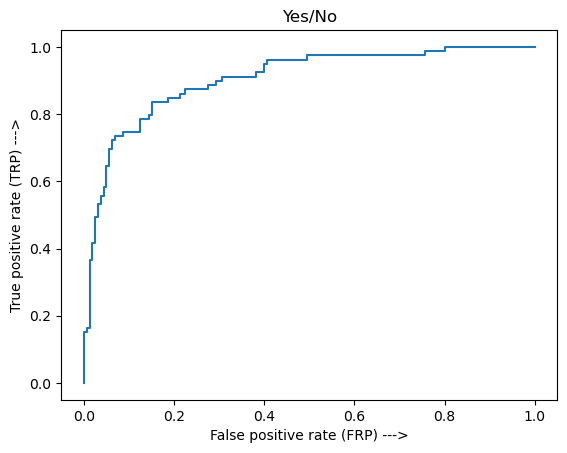

In [72]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FRP) --->")
plt.ylabel("True positive rate (TRP) --->") 
plt.title("Yes/No")

In [107]:
auc_value=auc(fpr,tpr)
auc_value

0.9044303797468354

# Desicion Tree Algorithm

# ModelTraining

In [73]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)


DecisionTreeClassifier()

# Model Evaluation

In [74]:
# Testing Accuracy
y_pred = DTC.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

Accuracy :  0.7666666666666667
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



In [75]:
# Training Accuracy
y_pred_train = DTC.predict(x_train)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Accuracy :  1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        79

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



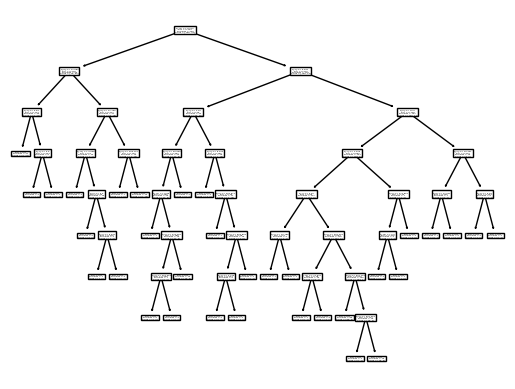

In [76]:
plot_tree(DTC)
print()

# Hyperparameter tunning

In [77]:
dt_model=DecisionTreeClassifier(random_state=12)
hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  # 2 * 5 * 18 * 13 = 2340

gscv_DTC = GridSearchCV(dt_model, hyperparameter, cv=5)
gscv_DTC.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [78]:
gscv_DTC.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=11,
                       random_state=12)

In [79]:
DTC = gscv_DTC.best_estimator_
DTC.fit(x_train, y_train)

# Testing Accuracy
y_pred = DTC.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[39  2]
 [ 4 15]]
************************************************************
Accuracy :  0.9
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.88      0.79      0.83        19

    accuracy                           0.90        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.90      0.90      0.90        60



In [80]:
# Training Accuracy
y_pred_train = DTC.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[143  16]
 [ 17  63]]
************************************************************
Accuracy :  0.8619246861924686
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       159
           1       0.80      0.79      0.79        80

    accuracy                           0.86       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.86      0.86      0.86       239



# Random forest Algorithm

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Model Training

In [82]:
RFC = RandomForestClassifier(random_state=10)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

# Model Evaluation

In [83]:
# testing Accuracy
y_pred = RFC.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[39  4]
 [ 3 14]]
*********************************************
Accuracy:  0.8833333333333333
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.78      0.82      0.80        17

    accuracy                           0.88        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.89      0.88      0.88        60



In [84]:
# Training Accuracy
y_pred_train = RFC.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[160   0]
 [  0  79]]
*********************************************
Accuracy:  1.0
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        79

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



# Hyper parameter Tunning

In [85]:
RF_model = RandomForestClassifier(random_state=12)
n_estimators=100, # Number of DT
criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt',
bootstrap=True,  # Can we avoid bootstrapping...?
oob_score=False,
n_jobs=-1,
random_state=None,
ccp_alpha=0.0

In [86]:
ccp_alpha_list = list(np.random.random(10))
ccp_alpha_list

[0.9950017904051897,
 0.3699543261687763,
 0.6338663291366569,
 0.6386237905098721,
 0.12074695154312176,
 0.22950030250112508,
 0.014663819800369793,
 0.6494194621028568,
 0.6488776474293435,
 0.7237068014320568]

In [87]:
RF_model = RandomForestClassifier()

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True],
    
    
                "ccp_alpha" : ccp_alpha_list
            }

gscv_RF_model = RandomizedSearchCV(RF_model, param_grid, cv = 5)
gscv_RF_model.fit(x_train, y_train)
gscv_RF_model.best_estimator_

RandomForestClassifier(ccp_alpha=0.014663819800369793, criterion='entropy',
                       max_depth=5, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=83, oob_score=True)

In [88]:
RFC = gscv_RF_model.best_estimator_
RFC.fit(x_train, y_train)

# testing Accuracy
y_pred = RFC.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[39  4]
 [ 3 14]]
*********************************************
Accuracy:  0.8833333333333333
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.78      0.82      0.80        17

    accuracy                           0.88        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.89      0.88      0.88        60



In [89]:
# Training Accuracy
y_pred_train = RFC.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[153   7]
 [ 16  63]]
*********************************************
Accuracy:  0.9037656903765691
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       160
           1       0.90      0.80      0.85        79

    accuracy                           0.90       239
   macro avg       0.90      0.88      0.89       239
weighted avg       0.90      0.90      0.90       239



In [90]:
RFC.feature_importances_

array([0.10536036, 0.01200048, 0.06128236, 0.00712808, 0.16425652,
       0.0050572 , 0.05357627, 0.13584564, 0.05955595, 0.00469302,
       0.00951414, 0.38172998])

In [91]:
x.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

<Axes: >

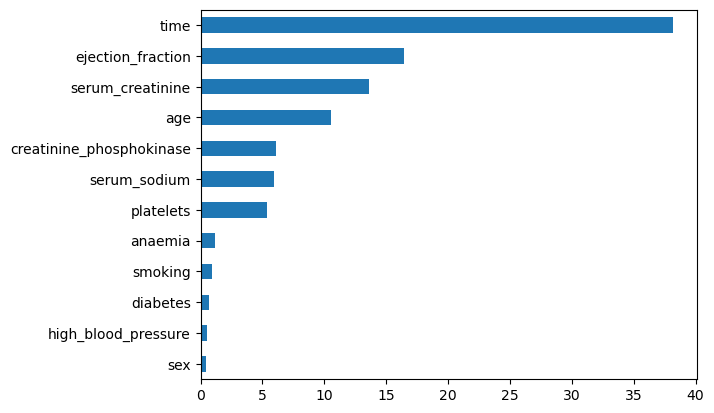

In [92]:
s1 = pd.Series(RFC.feature_importances_ * 100, index=x.columns)
s1.sort_values().plot(kind = 'barh')

In [93]:
df.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.006538,-0.001943,-0.295614,0.079351,-0.037862,0.388469,-0.202524,-0.004316,-0.012623,-0.568636,1.0


# KNN Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
# testing Accuracy
y_pred = knn.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[37  6]
 [12  5]]
*********************************************
Accuracy:  0.7
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80        43
           1       0.45      0.29      0.36        17

    accuracy                           0.70        60
   macro avg       0.60      0.58      0.58        60
weighted avg       0.67      0.70      0.68        60



In [97]:
# Training Accuracy
y_pred_train = knn.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[145  15]
 [ 43  36]]
*********************************************
Accuracy:  0.7573221757322176
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       160
           1       0.71      0.46      0.55        79

    accuracy                           0.76       239
   macro avg       0.74      0.68      0.69       239
weighted avg       0.75      0.76      0.74       239



# Hyperparameter Tunning

In [98]:
knn_clf = KNeighborsClassifier() # Estimator

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]} # Param_grid

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv=5)  # cv=5

gscv_knn_clf.fit(x_train, y_train) 
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=8, p=1)

In [99]:
# Testing Accuracy

knn_clf = gscv_knn_clf.best_estimator_

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[41  2]
 [15  2]]
************************************************************
Accuracy is --> 0.7166666666666667
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.73      0.95      0.83        43
           1       0.50      0.12      0.19        17

    accuracy                           0.72        60
   macro avg       0.62      0.54      0.51        60
weighted avg       0.67      0.72      0.65        60



In [100]:
# Training Data

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[156   4]
 [ 58  21]]
************************************************************
Accuracy is --> 0.7405857740585774
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.73      0.97      0.83       160
           1       0.84      0.27      0.40        79

    accuracy                           0.74       239
   macro avg       0.78      0.62      0.62       239
weighted avg       0.77      0.74      0.69       239



# Support Vector Machine

In [101]:
from sklearn.svm import SVC

In [102]:
svc=SVC(kernel='rbf',degree=3)

In [103]:
model_svc=svc.fit(x_train,y_train)

In [104]:
y_pred=model_svc.predict(x_test)

In [105]:
model_svc.score(x_train,y_train)

0.6694560669456067

In [106]:
model_svc.score(x_test,y_test)

0.7166666666666667

# Conclusion

Models:
    
1. Logistic Regression:-------->Training=0.84  Testing=0.86
 
2.Desicion Tree:--------->Training=0.86  Testing=0.9
    
3.Random Forest:-------->Training=0.90  Testing=0.88
    
4.KNN:----------->Training=0.74  Testing=0.71
    
5.SVM:---------->Training=0.66  Testing=0.71   

# Potential Limitations:


1.Small Sample Size:

The dataset contains only 299 records, which may limit the generalizability of any model trained on it.


2.Imbalance in Target Variable:

If the DEATH_EVENT column is imbalanced (e.g., significantly more 0s than 1s or vice versa), it could skew model performance.


3.Feature Representation:

Binary encoding (0/1) for categorical data (e.g., anaemia, sex, smoking) may oversimplify relationships.
Continuous variables like age, creatinine_phosphokinase, and platelets may need normalization or scaling.


4.Lack of Contextual Information:

The dataset does not provide context about the population (e.g., geographic location, clinical setting), which limits its external validity.


5.No Temporal Data:

The dataset has a time column, but it may not reflect dynamic trends over time, as it only tracks the follow-up period without detailed time-series data.

6.Potential Correlations:

Some features, like ejection_fraction and serum_creatinine, may be highly correlated, which could affect model performance.